<a href="https://colab.research.google.com/github/PrathamKumar125/Computer-Vision/blob/master/CV9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **9. write a program to implement deep learning based Deep Learning based Object Detection.**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
classFile = '/content/drive/MyDrive/CV_Datasets/object_detect/coco_class_labels.txt'

In [ ]:
with open(classFile) as fp:
  labels = fp.read().split("\n")
print(labels)

['unlabeled', 'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'street sign', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'hat', 'backpack', 'umbrella', 'shoe', 'eye glasses', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'plate', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed', 'mirror', 'dining table', 'window', 'desk', 'toilet', 'door', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'blender', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush', 'hair brush', '']


In [ ]:
modelFile = '/content/drive/MyDrive/CV_Datasets/object_detect/models/ssd_mobilenet_v2_coco_2018_03_29/frozen_inference_graph.pb'
configFile ='/content/drive/MyDrive/CV_Datasets/object_detect/models/ssd_mobilenet_v2_coco_2018_03_29.pbtxt'

In [ ]:
net = cv2.dnn.readNetFromTensorflow(modelFile, configFile)

In [ ]:
def detect_objects(net, im, dim = 300):
  blob = cv2.dnn.blobFromImage(im, 1.0, size=(dim, dim), mean=(0, 0, 0), swapRB=True, crop=False)
  net.setInput(blob)
  objects = net.forward()
  return objects

In [ ]:
FONTFACE = cv2.FONT_HERSHEY_SIMPLEX
FONT_SCALE = 0.7
THICKNESS = 1

In [ ]:
def display_text(im, text, x, y):
  textSize = cv2.getTextSize(text, FONTFACE, FONT_SCALE, THICKNESS)
  dim = textSize[0]
  baseline = textSize[1]
  cv2.rectangle(
      im,
       (x, y - dim[1] - baseline),
        (x + dim[0], y + baseline),
         (255, 0, 0),
      cv2.FILLED,
  )
  cv2.putText(
      im,
      text,
      (x, y - 5),
      FONTFACE,
      FONT_SCALE,
      (0, 0, 255),
      THICKNESS,
      cv2.LINE_AA,
  )

In [ ]:
def display_objects(im, objects, threshold=0.25):
  rows = im.shape[0]
  cols = im.shape[1]
  for i in range(objects.shape[2]):
    classId = int(objects[0, 0, i, 1])
    score = float(objects[0, 0, i, 2])
    x = int(objects[0, 0, i, 3] * cols)
    y = int(objects[0, 0, i, 4] * rows)
    w = int(objects[0, 0, i, 5] * cols - x)
    h = int(objects[0, 0, i, 6] * rows - y)
    if score > threshold:
      display_text(im, "{}".format(labels[classId]), x, y)
      cv2.rectangle(im, (x, y), (x + w, y + h), (255, 255, 0), 2)

  mp_img = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
  plt.figure(figsize=(30, 10))
  plt.imshow(mp_img)
  plt.show()

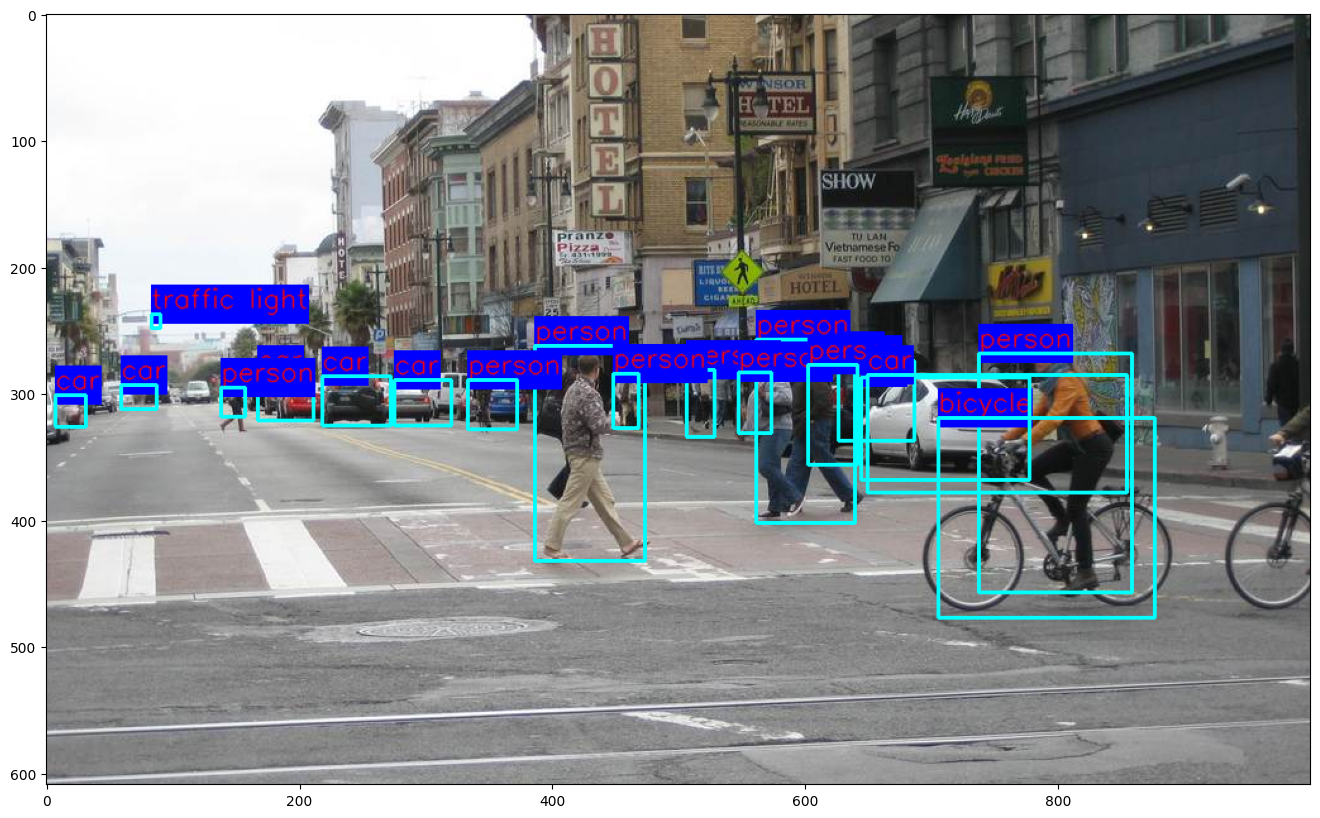

In [ ]:
im = cv2.imread('/content/drive/MyDrive/CV_Datasets/object_detect/images/street.jpg')
objects = detect_objects(net, im)
display_objects(im, objects)

In [ ]:
print(objects[0,0,0,0])
print(objects[0,0,0,1]) # class id
print(objects[0,0,0,2]) # score
print(objects[0,0,0,3]*im.shape[1]) #x= *cols
print(objects[0,0,0,4]*im.shape[0]) #y= *rows

0.0
3.0
0.8563567
59.75741893053055
293.5591946840286


In [ ]:
objects.shape[2]

100

In [ ]:
i=89
print(objects[0,0,i,1])
print(labels[int(objects[0,0,i,1])])
print(objects[0,0,i,2])

10.0
traffic light
0.066500865
